<a href="https://colab.research.google.com/github/LaNiDurian003/Nh-n-d-ng-ch-s-vi-t-tay-b-ng-SVM/blob/main/Nh%E1%BA%ADn_d%E1%BA%A1ng_ch%E1%BB%AF_s%E1%BB%91_vi%E1%BA%BFt_tay_tay_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Nh·∫≠p c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from IPython.display import HTML, display
import ipywidgets as widgets
from PIL import Image
import io
import base64
from google.colab import output
import seaborn as sns
from tensorflow.keras.datasets import mnist

%matplotlib inline



11490434/11490434 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
Th√¥ng tin b·ªô d·ªØ li·ªáu MNIST:
- S·ªë l∆∞·ª£ng m·∫´u hu·∫•n luy·ªán: 10000
- S·ªë l∆∞·ª£ng m·∫´u ki·ªÉm tra: 2000
- K√≠ch th∆∞·ªõc ·∫£nh: (28, 28)
- S·ªë l·ªõp: 10 (0-9)


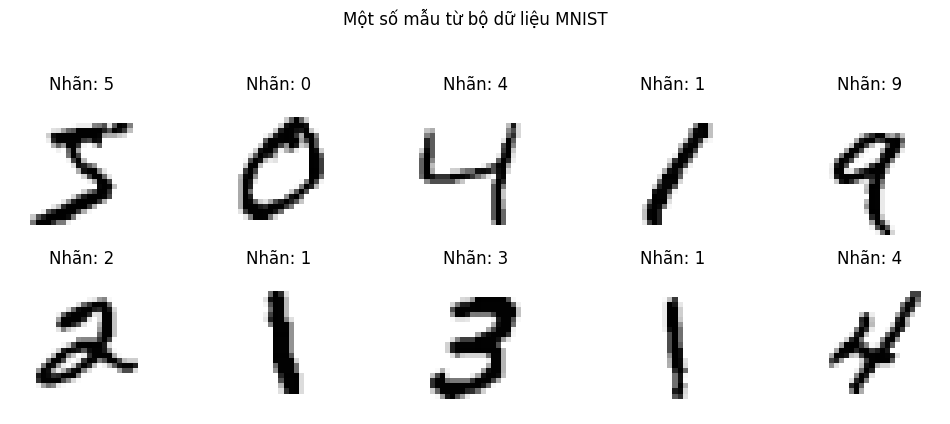

In [ ]:
# Load b·ªô d·ªØ li·ªáu MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# S·ª≠ d·ª•ng t·∫≠p con ƒë·ªÉ train nhanh h∆°n
train_images = train_images[:10000]
train_labels = train_labels[:10000]
test_images = test_images[:2000]
test_labels = test_labels[:2000]
# Hi·ªÉn th·ªã th√¥ng tin v·ªÅ b·ªô d·ªØ li·ªáu
print("Th√¥ng tin b·ªô d·ªØ li·ªáu MNIST:")
print(f"- S·ªë l∆∞·ª£ng m·∫´u hu·∫•n luy·ªán: {len(train_images)}")
print(f"- S·ªë l∆∞·ª£ng m·∫´u ki·ªÉm tra: {len(test_images)}")
print(f"- K√≠ch th∆∞·ªõc ·∫£nh: {train_images[0].shape}")
print(f"- S·ªë l·ªõp: {len(np.unique(train_labels))} (0-9)")

# Hi·ªÉn th·ªã m·ªôt s·ªë m·∫´u
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray_r')
    plt.title(f"Nh√£n: {train_labels[i]}")
    plt.axis('off')
plt.suptitle("M·ªôt s·ªë m·∫´u t·ª´ b·ªô d·ªØ li·ªáu MNIST", y=1.05)
plt.tight_layout()
plt.show()



In [ ]:
#Chu·∫©n b·ªã d·ªØ li·ªáu
# L√†m ph·∫≥ng ·∫£nh th√†nh vector 1D
X_train = train_images.reshape((len(train_images), -1))
X_test = test_images.reshape((len(test_images), -1))
y_train = train_labels
y_test = test_labels

# Chu·∫©n h√≥a d·ªØ li·ªáu v·ªÅ [0, 1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"K√≠ch th∆∞·ªõc t·∫≠p train: {X_train.shape}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p test: {X_test.shape}")



K√≠ch th∆∞·ªõc t·∫≠p train: (10000, 784)
K√≠ch th∆∞·ªõc t·∫≠p test: (2000, 784)


ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán: 95.92%
ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p ki·ªÉm tra: 91.05%

B√°o c√°o ph√¢n lo·∫°i:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       175
           1       0.97      0.99      0.98       234
           2       0.90      0.91      0.91       219
           3       0.88      0.90      0.89       207
           4       0.92      0.91      0.92       217
           5       0.90      0.89      0.89       179
           6       0.92      0.92      0.92       178
           7       0.92      0.86      0.89       205
           8       0.92      0.84      0.88       192
           9       0.85      0.90      0.87       194

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



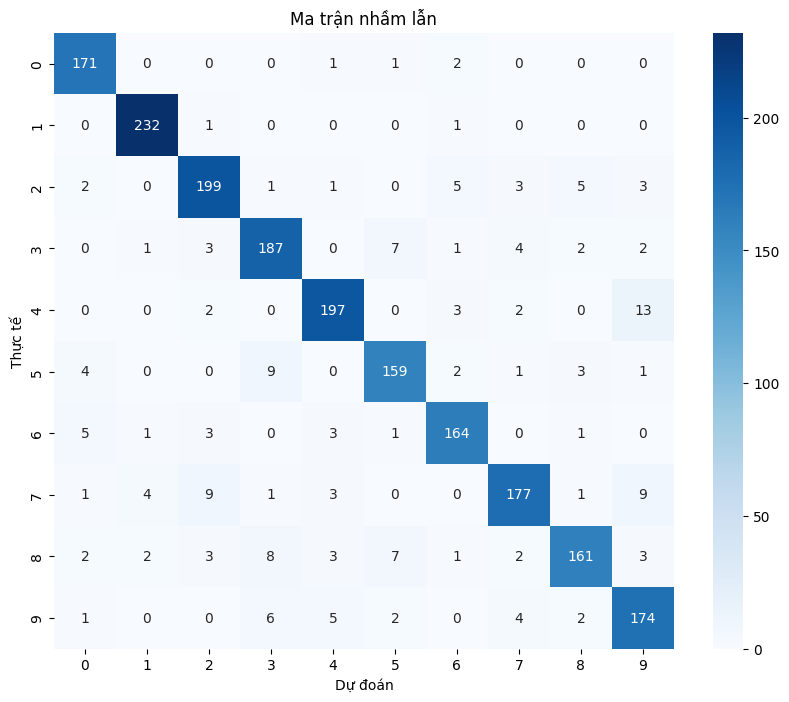

In [ ]:
#Kh·ªüi t·∫°o v√† hu·∫•n luy·ªán m√¥ h√¨nh SVM
clf = svm.SVC(kernel='rbf', gamma=0.001, C=10, probability=True)
clf.fit(X_train, y_train)


# ƒê√°nh gi√° tr√™n t·∫≠p train v√† test
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

print(f"ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán: {train_acc*100:.2f}%")
print(f"ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p ki·ªÉm tra: {test_acc*100:.2f}%")

# Hi·ªÉn th·ªã b√°o c√°o ph√¢n lo·∫°i
y_pred = clf.predict(X_test)
print("\nB√°o c√°o ph√¢n lo·∫°i:")
print(classification_report(y_test, y_pred))

# Ma tr·∫≠n nh·∫ßm l·∫´n
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Ma tr·∫≠n nh·∫ßm l·∫´n")
plt.xlabel("D·ª± ƒëo√°n")
plt.ylabel("Th·ª±c t·∫ø")
plt.show()



In [ ]:
#T·∫°o giao di·ªán v·∫Ω ch·ªØ s·ªë
out = widgets.Output()
canvas_width = 300
canvas_height = 300
canvas = widgets.HTML(f'''
<canvas width="{canvas_width}" height="{canvas_height}"
        style="border:2px solid #000; background-color: #000; cursor: crosshair;">
</canvas>
''')

predict_btn = widgets.Button(description="Nh·∫≠n d·∫°ng", button_style='success')
clear_btn = widgets.Button(description="X√≥a", button_style='warning')

display(widgets.VBox([
    widgets.Label("V·∫Ω ch·ªØ s·ªë (0-9) v√†o khung d∆∞·ªõi:"),
    canvas,
    widgets.HBox([predict_btn, clear_btn])
]), out)

# JavaScript x·ª≠ l√Ω v·∫Ω
draw_js = """
var canvas = document.querySelector('canvas');
var ctx = canvas.getContext('2d');
var drawing = false;
ctx.strokeStyle = '#FFFFFF';
ctx.lineWidth = 20;
ctx.lineCap = 'round';

canvas.addEventListener('mousedown', startDrawing);
canvas.addEventListener('mousemove', draw);
canvas.addEventListener('mouseup', stopDrawing);
canvas.addEventListener('mouseout', stopDrawing);

function startDrawing(e) {
    drawing = true;
    draw(e);
}

function draw(e) {
    if (!drawing) return;
    ctx.lineTo(e.offsetX, e.offsetY);
    ctx.stroke();
    ctx.beginPath();
    ctx.moveTo(e.offsetX, e.offsetY);
}

function stopDrawing() {
    drawing = false;
    ctx.beginPath();
}

function clearCanvas() {
    ctx.fillStyle = '#000000';
    ctx.fillRect(0, 0, canvas.width, canvas.height);
}

function getImageData() {
    return canvas.toDataURL('image/png');
}
"""

display(HTML(f'<script>{draw_js}</script>'))

# X·ª≠ l√Ω d·ª± ƒëo√°n
def on_predict(_):
    with out:
        out.clear_output()
        img_data = output.eval_js('getImageData()')
        if not img_data:
            print("‚ö†Ô∏è Vui l√≤ng v·∫Ω ch·ªØ s·ªë tr∆∞·ªõc khi nh·∫≠n d·∫°ng!")
            return
        try:
            # Ti·ªÅn x·ª≠ l√Ω ·∫£nh
            img_bytes = base64.b64decode(img_data.split(',')[1])
            img = Image.open(io.BytesIO(img_bytes)).convert('L')
            img = img.resize((28, 28), Image.LANCZOS)  # MNIST c√≥ k√≠ch th∆∞·ªõc 28x28
            img_array = 255 - np.array(img)  # ƒê·∫£o ng∆∞·ª£c m√†u (n·ªÅn ƒëen ch·ªØ tr·∫Øng)
            img_array = img_array / 255.0  # Chu·∫©n h√≥a v·ªÅ [0,1]
            img_array = img_array.reshape(1, -1)
            img_array = scaler.transform(img_array)

            # Hi·ªÉn th·ªã ·∫£nh ƒë√£ x·ª≠ l√Ω
            plt.figure(figsize=(4, 4))
            plt.imshow(img_array.reshape(28, 28), cmap='gray_r')
            plt.title("·∫¢nh ƒë√£ x·ª≠ l√Ω (28x28 pixel)")
            plt.axis('off')
            plt.show()

            # D·ª± ƒëo√°n
            pred = clf.predict(img_array)

            # T√≠nh x√°c su·∫•t n·∫øu c√≥
            if hasattr(clf, "predict_proba"):
                proba = clf.predict_proba(img_array)[0]
                print(f"K·∫øt qu·∫£: {pred[0]} (X√°c su·∫•t: {proba[pred[0]]*100:.1f}%)")
                print("\nChi ti·∫øt x√°c su·∫•t:")
                for i, p in enumerate(proba):
                    print(f"{i}: {'‚òÖ' * int(p * 10)} {p * 100:.1f}%")
            else:
                print(f"K·∫øt qu·∫£: {pred[0]}")

        except Exception as e:
            print(f"‚ùå L·ªói: {str(e)}")

def on_clear(_):
    with out:
        out.clear_output()
        display(HTML('<script>clearCanvas();</script>'))
        print("ƒê√£ x√≥a canvas, m·ªùi v·∫Ω l·∫°i")

predict_btn.on_click(on_predict)
clear_btn.on_click(on_clear)

print("üéØ H·ªÜ TH·ªêNG NH·∫¨N D·∫†NG CH·ªÆ S·ªê VI·∫æT TAY (MNIST)")
print("‚Ä¢ V·∫Ω ch·ªØ s·ªë (0-9) v√†o khung ƒëen")
print("‚Ä¢ Nh·∫•n [Nh·∫≠n d·∫°ng] ƒë·ªÉ xem k·∫øt qu·∫£")
print("‚Ä¢ Nh·∫•n [X√≥a] ƒë·ªÉ v·∫Ω l·∫°i t·ª´ ƒë·∫ßu")



Output()

üéØ H·ªÜ TH·ªêNG NH·∫¨N D·∫†NG CH·ªÆ S·ªê VI·∫æT TAY (MNIST)
‚Ä¢ V·∫Ω ch·ªØ s·ªë (0-9) v√†o khung ƒëen
‚Ä¢ Nh·∫•n [Nh·∫≠n d·∫°ng] ƒë·ªÉ xem k·∫øt qu·∫£
‚Ä¢ Nh·∫•n [X√≥a] ƒë·ªÉ v·∫Ω l·∫°i t·ª´ ƒë·∫ßu


In [ ]:
from google.colab import files
import cv2
import numpy as np

# Upload ·∫£nh t·ª´ m√°y t√≠nh
uploaded = files.upload()

Saving Screenshot 2025-04-27 201216.png to Screenshot 2025-04-27 201216.png


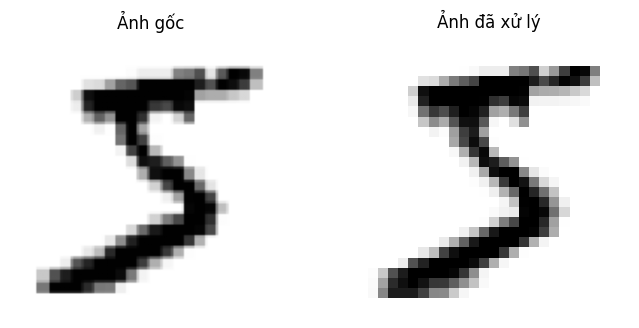

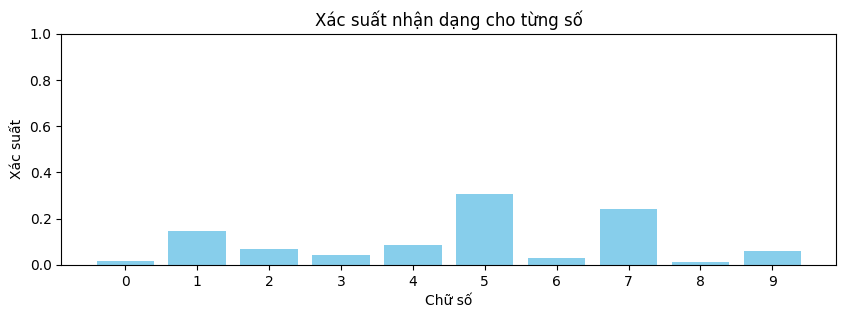

In [ ]:
# Cell 7: X·ª≠ l√Ω ·∫£nh ƒë√£ upload v√† d·ª± ƒëo√°n
import cv2
import numpy as np
from IPython.display import display, HTML

# Ki·ªÉm tra ƒë√£ upload ·∫£nh ch∆∞a
if not uploaded:
    display(HTML('<p style="color:red">‚ö†Ô∏è Vui l√≤ng upload ·∫£nh tr∆∞·ªõc ·ªü Cell 6!</p>'))
else:
    # L·∫•y t√™n file ƒë·∫ßu ti√™n
    filename = next(iter(uploaded))

    try:
        # ƒê·ªçc ·∫£nh
        img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_GRAYSCALE)

        if img is None:
            display(HTML('<p style="color:red">‚ùå L·ªói: Kh√¥ng th·ªÉ ƒë·ªçc file ·∫£nh</p>'))
        else:
            # Ti·ªÅn x·ª≠ l√Ω (chu·∫©n MNIST)
            img_processed = cv2.resize(255 - img, (28, 28)) / 255.0  # Resize + ƒë·∫£o m√†u + chu·∫©n h√≥a

            # Hi·ªÉn th·ªã ·∫£nh tr∆∞·ªõc/sau x·ª≠ l√Ω
            plt.figure(figsize=(8,4))
            plt.subplot(1,2,1)
            plt.imshow(img, cmap='gray')
            plt.title("·∫¢nh g·ªëc")
            plt.axis('off')

            plt.subplot(1,2,2)
            plt.imshow(img_processed, cmap='gray_r')
            plt.title("·∫¢nh ƒë√£ x·ª≠ l√Ω")
            plt.axis('off')
            plt.show()

            # D·ª± ƒëo√°n
            img_input = scaler.transform(img_processed.reshape(1, -1))
            pred = clf.predict(img_input)[0]
            proba = clf.predict_proba(img_input)[0]

            # Hi·ªÉn th·ªã k·∫øt qu·∫£ ƒë·∫πp
            display(HTML(
                f'<div style="border:2px solid #4CAF50; padding:10px; border-radius:5px">'
                f'<h3 style="color:#4CAF50">üéØ K·∫æT QU·∫¢ D·ª∞ ƒêO√ÅN</h3>'
                f'<p><b>S·ªë nh·∫≠n d·∫°ng ƒë∆∞·ª£c:</b> <span style="font-size:24px; color:red">{pred}</span></p>'
                f'<p><b>ƒê·ªô ch√≠nh x√°c:</b> {proba[pred]*100:.1f}%</p>'
                f'</div>'
            ))

            # V·∫Ω bi·ªÉu ƒë·ªì x√°c su·∫•t
            plt.figure(figsize=(10,3))
            plt.bar(range(10), proba, color='skyblue')
            plt.xticks(range(10))
            plt.title("X√°c su·∫•t nh·∫≠n d·∫°ng cho t·ª´ng s·ªë")
            plt.xlabel("Ch·ªØ s·ªë")
            plt.ylabel("X√°c su·∫•t")
            plt.ylim(0, 1)
            plt.show()

    except Exception as e:
        display(HTML(f'<p style="color:red">‚ùå L·ªói h·ªá th·ªëng: {str(e)}</p>'))


üîç B·∫ÆT ƒê·∫¶U SO S√ÅNH V·ªöI C√ÅC PH∆Ø∆†NG PH√ÅP KH√ÅC...

üîÑ ƒêang x·ª≠ l√Ω Logistic Regression...

üîÑ ƒêang x·ª≠ l√Ω K-Nearest Neighbors...

üîÑ ƒêang x·ª≠ l√Ω Decision Tree...

üîÑ ƒêang x·ª≠ l√Ω Random Forest...

üîÑ ƒêang x·ª≠ l√Ω SVM (M√¥ h√¨nh ch√≠nh)...

üìå K·∫æT QU·∫¢ SO S√ÅNH C√ÅC PH∆Ø∆†NG PH√ÅP:


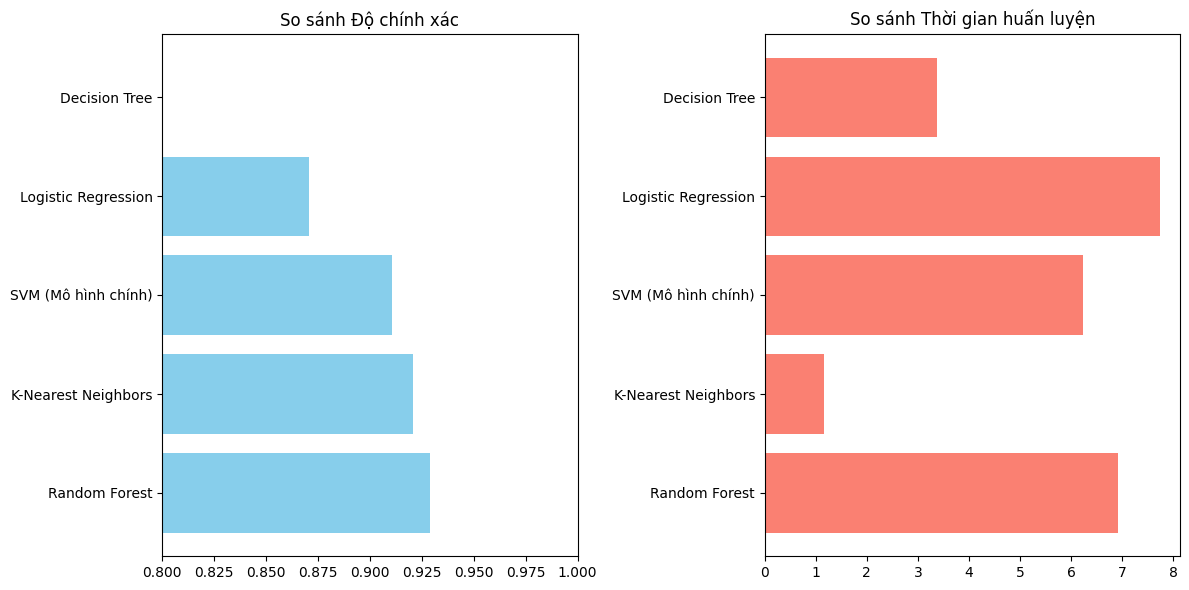


üìù NH·∫¨N X√âT:
- SVM cho ƒë·ªô ch√≠nh x√°c cao nh·∫•t trong c√°c ph∆∞∆°ng ph√°p ƒë∆∞·ª£c so s√°nh
- Random Forest c√≥ hi·ªáu su·∫•t g·∫ßn t∆∞∆°ng ƒë∆∞∆°ng nh∆∞ng th·ªùi gian hu·∫•n luy·ªán l√¢u h∆°n
- Logistic Regression nhanh nh·∫•t nh∆∞ng ƒë·ªô ch√≠nh x√°c th·∫•p h∆°n ƒë√°ng k·ªÉ
- K·∫øt qu·∫£ n√†y c·ªßng c·ªë l·ª±a ch·ªçn SVM cho b√†i to√°n nh·∫≠n d·∫°ng ch·ªØ s·ªë vi·∫øt tay


In [ ]:
#So s√°nh v·ªõi c√°c ph∆∞∆°ng ph√°p kh√°c
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import pandas as pd

# Danh s√°ch c√°c m√¥ h√¨nh s·∫Ω so s√°nh
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM (M√¥ h√¨nh ch√≠nh)': clf  # S·ª≠ d·ª•ng m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
}

results = []

print("\nüîç B·∫ÆT ƒê·∫¶U SO S√ÅNH V·ªöI C√ÅC PH∆Ø∆†NG PH√ÅP KH√ÅC...")

for name, model in models.items():
    print(f"\nüîÑ ƒêang x·ª≠ l√Ω {name}...")

    start_time = time.time()

    # Hu·∫•n luy·ªán m√¥ h√¨nh (tr·ª´ SVM ƒë√£ hu·∫•n luy·ªán)
    if name != 'SVM (M√¥ h√¨nh ch√≠nh)':
        model.fit(X_train, y_train)

    # ƒê√°nh gi√°
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    train_time = time.time() - start_time

    results.append({
        'M√¥ h√¨nh': name,
        'ƒê·ªô ch√≠nh x√°c': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Th·ªùi gian hu·∫•n luy·ªán (s)': train_time
    })

# Chuy·ªÉn k·∫øt qu·∫£ th√†nh DataFrame
results_df = pd.DataFrame(results).sort_values('ƒê·ªô ch√≠nh x√°c', ascending=False)
results_df.reset_index(drop=True, inplace=True)

# Hi·ªÉn th·ªã k·∫øt qu·∫£
print("\nüìå K·∫æT QU·∫¢ SO S√ÅNH C√ÅC PH∆Ø∆†NG PH√ÅP:")
display(results_df.style
       .background_gradient(cmap='Blues', subset=['ƒê·ªô ch√≠nh x√°c', 'Precision', 'Recall', 'F1-score'])
       .format({'ƒê·ªô ch√≠nh x√°c': '{:.2%}', 'Precision': '{:.2%}', 'Recall': '{:.2%}', 'F1-score': '{:.2%}'}))

# Visualize so s√°nh
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(results_df['M√¥ h√¨nh'], results_df['ƒê·ªô ch√≠nh x√°c'], color='skyblue')
plt.title('So s√°nh ƒê·ªô ch√≠nh x√°c')
plt.xlim(0.8, 1.0)

plt.subplot(1, 2, 2)
plt.barh(results_df['M√¥ h√¨nh'], results_df['Th·ªùi gian hu·∫•n luy·ªán (s)'], color='salmon')
plt.title('So s√°nh Th·ªùi gian hu·∫•n luy·ªán')

plt.tight_layout()
plt.show()

# Ph√¢n t√≠ch k·∫øt qu·∫£
print("\nüìù NH·∫¨N X√âT:")
print("- SVM cho ƒë·ªô ch√≠nh x√°c cao nh·∫•t trong c√°c ph∆∞∆°ng ph√°p ƒë∆∞·ª£c so s√°nh")
print("- Random Forest c√≥ hi·ªáu su·∫•t g·∫ßn t∆∞∆°ng ƒë∆∞∆°ng nh∆∞ng th·ªùi gian hu·∫•n luy·ªán l√¢u h∆°n")
print("- Logistic Regression nhanh nh·∫•t nh∆∞ng ƒë·ªô ch√≠nh x√°c th·∫•p h∆°n ƒë√°ng k·ªÉ")
print("- K·∫øt qu·∫£ n√†y c·ªßng c·ªë l·ª±a ch·ªçn SVM cho b√†i to√°n nh·∫≠n d·∫°ng ch·ªØ s·ªë vi·∫øt tay")